# Gurgen Hovakimyan

## Food Consumption Visualization

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# this is my function
from data_summary import Description

In [2]:
# importing data
food_consumption = pd.read_csv("food_consumption.csv")

### Introduction to data

In [3]:
food_consumption.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


As main describe function doesn't show character variables summary I created my own summary function and decided to use it

In [4]:
food_summary = Description(food_consumption)

In [5]:
food_summary.summary()

country
Count :  1430
Unique :  130


food_category
Count :  1430
Unique :  11


consumption
Count :  1430
Min :  0.0
1st Q :  2.365
Median :  8.89
3rd Q :  28.1325
Max :  430.76
Mean :  28.110405594405623
St. dev :  49.818044459705504


co2_emmission
Count :  1430
Min :  0.0
1st Q :  5.210000000000001
Median :  16.53
3rd Q :  62.597500000000004
Max :  1712.0
Mean :  74.38399300699302
St. dev :  152.09856553747755




As we see we have 130 countries and 11 unique products.

In [6]:
food_consumption.isnull().any()

country          False
food_category    False
consumption      False
co2_emmission    False
dtype: bool

In [7]:
food_consumption[food_consumption.select_dtypes(['object']).columns] =\
food_consumption.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [8]:
food_consumption.dtypes

country          category
food_category    category
consumption       float64
co2_emmission     float64
dtype: object

### Visualization

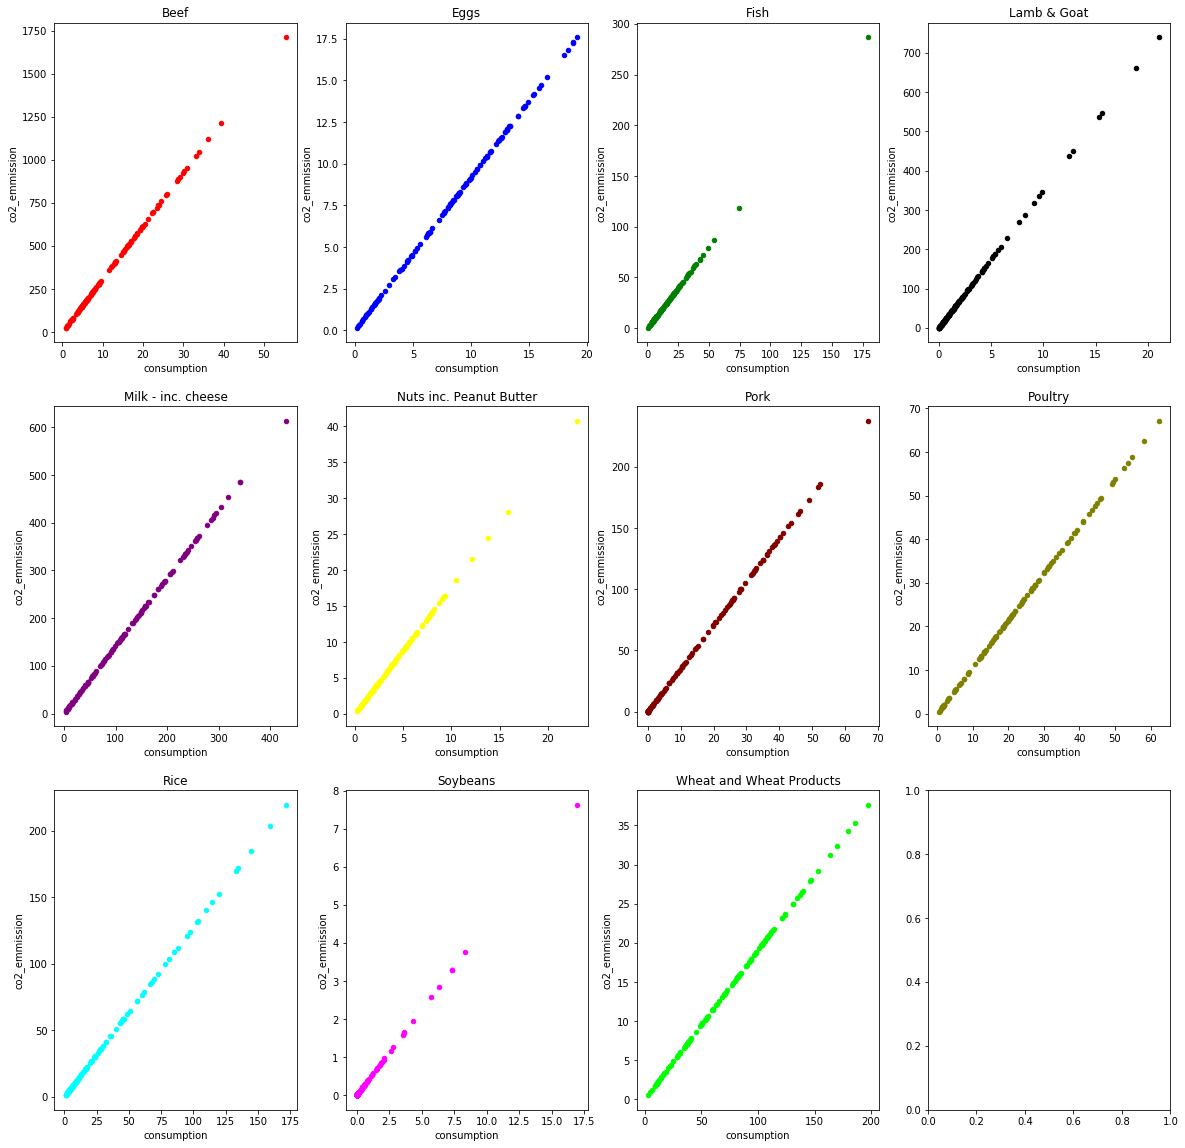

In [9]:
%matplotlib inline

names = list(set(food_consumption.groupby(["food_category"]).groups))
color = ['red', 'blue', 'green', 'black', 'purple', 'yellow', 'maroon', 'olive', 'aqua', 'fuchsia', 'lime']
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
for (title_name, group), ax, i in zip(food_consumption.groupby(["food_category"]), axes.flatten(), range(15)):
    group.plot( x = 'consumption', y= 'co2_emmission', kind = 'scatter',\
               ax = ax, c = color[i], title = str(title_name));

It looks like that we have perfect correlation between consumption and co2_emmission.

In [10]:
food_consumption.groupby("food_category")[["consumption", "co2_emmission"]].corr()

consumption  co2_emmission
food_category                                                     
Beef                     consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Eggs                     consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Fish                     consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Lamb & Goat              consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Milk - inc. cheese       consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Nuts inc. Peanut Butter  consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Pork                     consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Poultry                  consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Rice                     consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000
Soybeans                 consumption       1.000000       0.999996
                         co2_emmission     0.999996       1.000000
Wheat and Wheat Products consumption       1.000000       1.000000
                         co2_emmission     1.000000       1.000000

As expected I got almost perfect correlation everywhere.

In [11]:
new_df = food_consumption[food_consumption["co2_emmission"] <= 100].copy()

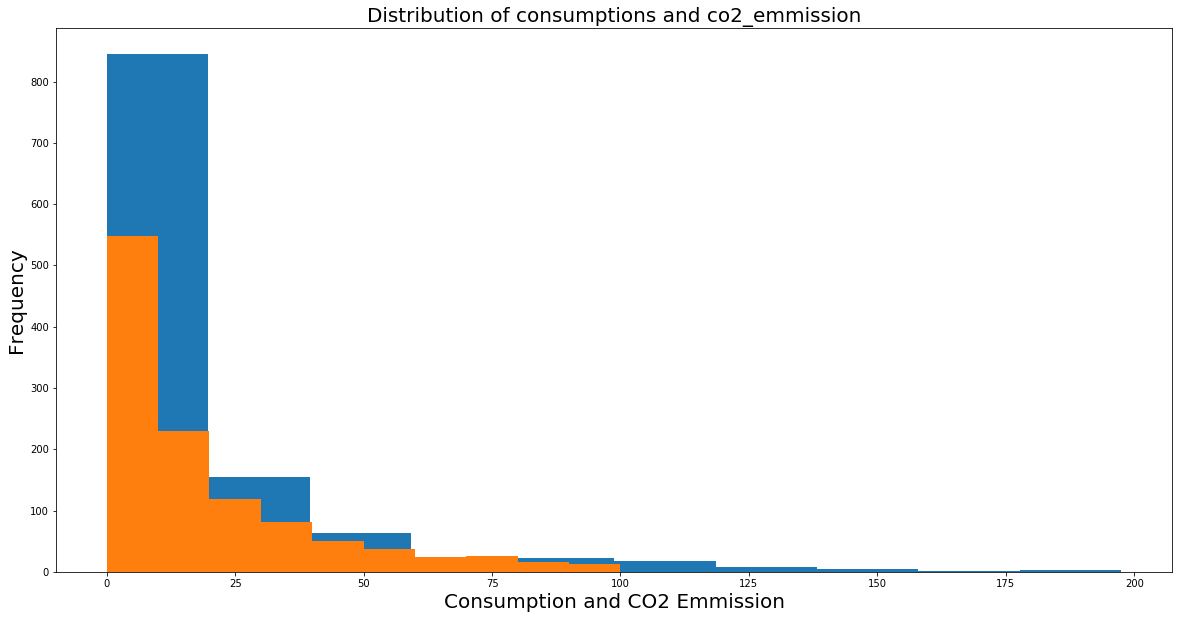

In [12]:
plt.figure(figsize=(20,10))
plt.title("Distribution of consumptions and co2_emmission", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Consumption and CO2 Emmission", size = 20)
plt.hist(new_df.consumption)
plt.hist(new_df.co2_emmission);

In [13]:
bar_plot_data = food_consumption[food_consumption["consumption"] != 0].copy()

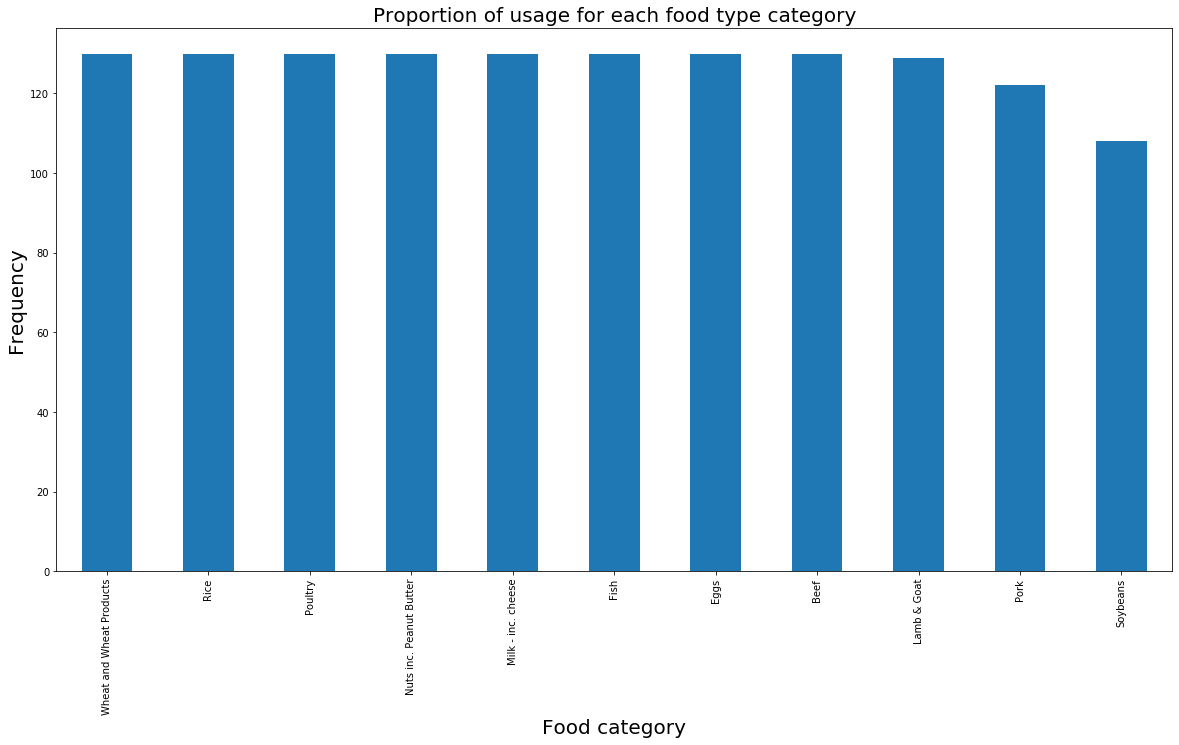

In [14]:
plt.figure(figsize=(20,10))
plt.title("Proportion of usage for each food type category", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Food category", size = 20)
bar_plot_data['food_category'].value_counts().plot(kind='bar');

As expected some countries don't use pork, but I don't know why other countries don't use soybeans?